<a href="https://colab.research.google.com/github/SJhawar1010/NLP/blob/main/Satyam_554_Exercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/NLP Datasets/SATYAM JHAWAR 2348554 - seattle-weather.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [5]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [6]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [7]:
df.shape

(1461, 6)

In [8]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,01-01-2012,0.0,12.8,5.0,4.7,drizzle
1,02-01-2012,10.9,10.6,2.8,4.5,rain
2,03-01-2012,0.8,11.7,7.2,2.3,rain
3,04-01-2012,20.3,12.2,5.6,4.7,rain
4,05-01-2012,1.3,8.9,2.8,6.1,rain


rain: 641
sun: 640
fog: 101
drizzle: 53
snow: 26


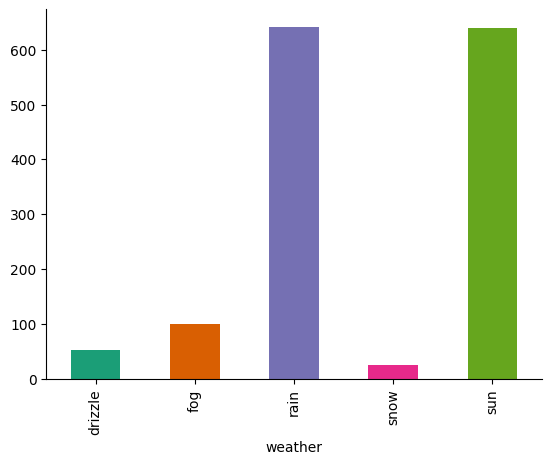

In [12]:
df.groupby('weather').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
Weather_Count = df['weather'].value_counts()
for channel, count in zip(Weather_Count.index, Weather_Count):
    print(f'{channel}: {count}')

In [26]:
df['date'] = pd.to_datetime(df['date'])

In [28]:
features = df[['precipitation', 'temp_max', 'temp_min', 'wind']]
target = df['weather']

In [38]:
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

In [39]:
target_one_hot = pd.get_dummies(target_encoded)

In [40]:
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

In [41]:
sequence_length = 10
X, y = [], []

In [42]:
for i in range(len(features_scaled) - sequence_length):
    X.append(features_scaled[i:i + sequence_length])
    y.append(target_one_hot.iloc[i + sequence_length])

X, y = np.array(X), np.array(y)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(target_one_hot.shape[1], activation='softmax'))

In [46]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
26/26 [==============================] - 1s 11ms/step - loss: 1.4457 - accuracy: 0.3768 - val_loss: 1.1935 - val_accuracy: 0.4384
Epoch 2/10
26/26 [==============================] - 0s 3ms/step - loss: 1.1306 - accuracy: 0.4520 - val_loss: 1.0701 - val_accuracy: 0.5714
Epoch 3/10
26/26 [==============================] - 0s 3ms/step - loss: 1.0922 - accuracy: 0.4975 - val_loss: 1.0534 - val_accuracy: 0.6108
Epoch 4/10
26/26 [==============================] - 0s 3ms/step - loss: 1.0835 - accuracy: 0.5025 - val_loss: 1.0541 - val_accuracy: 0.6355
Epoch 5/10
26/26 [==============================] - 0s 3ms/step - loss: 1.0812 - accuracy: 0.5394 - val_loss: 1.0424 - val_accuracy: 0.5616
Epoch 6/10
26/26 [==============================] - 0s 3ms/step - loss: 1.0785 - accuracy: 0.5320 - val_loss: 1.0349 - val_accuracy: 0.6453
Epoch 7/10
26/26 [==============================] - 0s 3ms/step - loss: 1.0734 - accuracy: 0.5234 - val_loss: 1.0307 - val_accuracy: 0.6158
Epoch 8/10
26/26 [=

In [48]:
accuracy = model.evaluate(X_test, y_test)[1]
print(f"Accuracy on the test set: {accuracy}")

14/14 [==============================] - 0s 2ms/step - loss: 1.0484 - accuracy: 0.5321
Accuracy on the test set: 0.5321100950241089


14/14 [==============================] - 0s 3ms/step


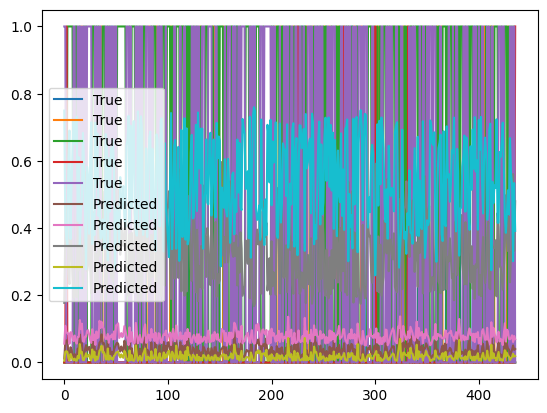

In [49]:
predictions = model.predict(X_test)
plt.plot(y_test, label='True')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()